<h3> Daniel Dorado - Sofía Álvarez </h3>

In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.integrate import quad

<h1 align='center'> Tarea 6: Física del Estado Sólido </h1>

<h3> 1. Magnetism in One-Dimensional Systems - The Heisenberg Model for Infinite Spin (Michael E. Fisher) </h3>

Calculamos el calor específico en función de la temperatura, haciendo $C/Nk$ vs $kT/J$.

<h4> Cadena de Heisenberg de espín infinito </h4>
En este caso, el calor específico está dado por: $$\frac{C_N}{Nk} = 1 - \frac{K^2}{\sinh^2{K}},$$ donde $K = J/2kT$. Si definimos $x = kT/J$, tal que $K = 1/2x$ y $y = C_N/Nk$, $$y = 1 - \frac{(1/2x)^2}{\sinh^2{(1/2x)}} $$
<h4>Modelo de Ising con $s=1/2$</h4>
Si adaptamos la capacidad calorífica de <a href=http://216.92.172.113/courses/phys39/simulations/Gould%20Ising%20assignment%20chap%205.pdf>Gould y Tobochnik</a> para $s=1/2$, y de acuerdo con <a href="https://journals.aps.org/pr/abstract/10.1103/PhysRev.127.1508">Katsura</a> tenemos:
\begin{align}
\frac{C_N}{Nk} &= \left(\frac{J}{2kT}\right)^2 \mathrm{sech}\left(\frac{J}{2kT}\right)^2 = K^2  \mathrm{sech}\left(K\right)^2.
\end{align} 
Entonces, $$y = \frac{1}{4x^2} \mathrm{sech}\left(1/2x\right)^2 = \frac{1}{4x^2 \cosh^2{\left(1/2x\right). }}$$
<h4>Cadenas de Heisenberg antiferromagnéticas y ferromagnéticas</h4>
Utilizamos los datos obtenidos por <a href="https://www.sciencedirect.com/science/article/abs/pii/003189147490072X">Blöte</a>.

<h4>Cadena puramente transversa ($J^{||} = 0$) con espín s=1/2:</h4>
De acuerdo con <a href="https://journals.aps.org/pr/abstract/10.1103/PhysRev.127.1508">Katsura</a>, el calor específico en este caso está dado por:
$$\frac{C_N}{Nk} = \frac{4K^2}{\pi}\int_0^\pi \frac{\cos^2{\omega}}{\cosh^2({2K\cos{\omega}})} d\omega.$$
Usando la definición de $x$ y $y$,
$$y = \frac{(1/x)^2}{\pi}\int_0^\pi \frac{\cos^2{\omega}}{\cosh^2({(1/x)\cos{\omega}})} d\omega.$$

In [2]:
def C_N_Heisenberg_infinite_spin(x):
    return 1 - ((1/(2*x))**2)/(np.sinh(1/(2*x))**2)

In [3]:
def C_N_Pure_Transverse(x):
    def integrando(w,x):
        return (np.cos(w)**2)/(np.cosh(np.cos(w)/x)**2)
    I =np.array([quad(integrando, 0, np.pi, args=i)[0] for i in x])
    return I/(np.pi * (x**2))

In [4]:
def C_N_Ising(x):
    # return 1/(x * np.cosh(1/x))**2
    return 1/(2*x * np.cosh(1/(2*x)))**2

In [5]:
x = np.linspace(0.01, 1.4, 1000)
x_heis_F = pd.read_csv('F_Heisenberg.txt', delimiter=' ')['x']
x_heis_AF = pd.read_csv('AF_Heisenberg.txt', delimiter=' ')['x']
y_heis_inf_spin = C_N_Heisenberg_infinite_spin(x)
y_pure_transverse = C_N_Pure_Transverse(x)
y_ising = C_N_Ising(x)
y_FH = pd.read_csv('F_Heisenberg.txt', delimiter=' ')['c']
y_AFH = pd.read_csv('AF_Heisenberg.txt', delimiter=' ')['c']

In [6]:
ext_FH = interpolate.interp1d(x_heis_F, y_FH, fill_value='extrapolate', kind='slinear')
x_falt_FH = np.linspace(0.0,0.029,10)
y_falt_FH = ext_FH(x_falt_FH)
x_heis_F = np.concatenate((x_falt_FH, x_heis_F),axis=0)
y_FH = np.concatenate((y_falt_FH, y_FH),axis=0)

In [7]:
ext_AFH = interpolate.interp1d(x_heis_AF, y_AFH, fill_value='extrapolate', kind='quadratic')
x_falt_AFH = np.linspace(0.01,0.2,20)
y_falt_AFH = ext_AFH(x_falt_AFH)
x_heis_AF = np.concatenate((x_falt_AFH, x_heis_AF),axis=0)
y_AFH = np.concatenate((y_falt_AFH, y_AFH),axis=0)

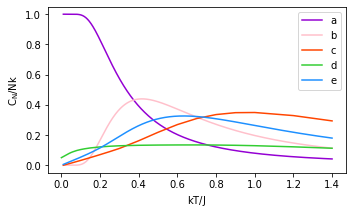

In [8]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(x, y_heis_inf_spin, c='darkviolet', label='a')
plt.plot(x, y_ising, c='pink', label='b')
plt.plot(x_heis_AF, y_AFH, c='orangered', label='c')
plt.plot(x_heis_F, y_FH, c='limegreen', label='d')
plt.plot(x, y_pure_transverse, c='dodgerblue', label='e')
plt.ylabel('$\mathrm{C}_\mathrm{N}/\mathrm{Nk}$')
plt.xlabel('$\mathrm{kT}/\mathrm{J}$')
plt.legend()
plt.tight_layout()
plt.savefig('fig1_fisher.pdf')

In [ ]:
def chi_Ising(x):
    return 1 - (2/3)*np.exp(-2*x) + (1/3)*np.exp(-4*x) - (2/15)*np.exp(-6*x) + 1/45*np.exp(-8*x)

def u(K):
    return (np.tanh(K))**(-1)-1/K

In [ ]:
x = np.linspace(0.01, 15, 1000)
y = np.linspace(0., 15, 1000)
plt.figure(figsize=(8,4.5))
plt.plot(x,chi_Ising(1/x), color='paleturquoise', label='Modelo de Ising')
plt.plot(x,4*x**(-1)*(1-u(2/x))/(1+u(2/x)), color='salmon', label='Cadena de Heisenberg ferromagnética')
plt.xlabel(r'$kT/J$')
plt.ylabel(r'$\chi(T)/\chi_0$')
plt.legend()
plt.show()

<h3> 2. Quantum phase transitions: a variational mean-field perspective (Richter  + Derzhko) </h3>



Graficamos $E_0/N$ en función de $J'/J$:

In [60]:
def E_0(x):
    if x <= 3:
        return -3*x/8 - ( 3/(8*x) )*( 1 - x/3 )**2
    else:
        return -3*x/8

In [61]:
x_1 = np.linspace(1,3,1000)
x_2 = np.linspace(3.01,5,1000)
y_1 = [E_0(i) for i in x_1]
y_2 = [E_0(i) for i in x_2]

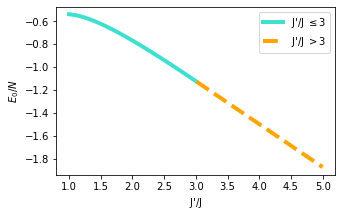

In [73]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(x_1,y_1, c='turquoise',linewidth=4.0, label="J'$/$J $\leq 3$")
plt.plot(x_2,y_2, '--', c='orange', linewidth=4.0, label="J'$/$J $> 3$")
plt.xlabel("J'$/$J")
plt.ylabel("$E_0/N$")
plt.legend()
plt.savefig('06_fig4_richter.pdf')

In [101]:
def dv_E_0(x):
    if x <= 3:
        return -3/8 + (1/4)*( 1 - x/3 )
    else:
        return -3/8

In [102]:
x_1 = np.linspace(2.8,3,1000)
x_2 = np.linspace(3.001,3.2,1000)
d_y_1 = [dv_E_0(i) for i in x_1]
d_y_2 = [dv_E_0(i) for i in x_2]

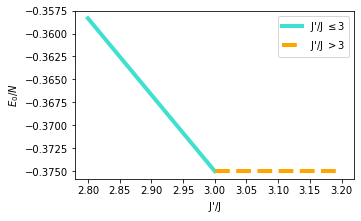

In [104]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(x_1,d_y_1, c='turquoise',linewidth=4.0, label="J'$/$J $\leq 3$")
plt.plot(x_2,d_y_2, '--', c='orange', linewidth=4.0, label="J'$/$J $> 3$")
plt.xlabel("J'$/$J")
plt.ylabel("$E_0/N$")
plt.legend()
plt.savefig('06_inset_fig4_richter.pdf')